## Packages
- install.packages('randomForest')

In [25]:
library(e1071)
library(randomForest)

data_ = read.csv("Credit.csv", stringsAsFactors=T)
dim(data_)
head(data_)
summary(data_)

[1] 1000   21

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


      checking_status    duration                             credit_history
 'no checking':394    Min.   : 4.0   'all paid'                      : 49   
 <0           :274    1st Qu.:12.0   'critical/other existing credit':293   
 >=200        : 63    Median :18.0   'delayed previously'            : 88   
 0<=X<200     :269    Mean   :20.9   'existing paid'                 :530   
                      3rd Qu.:24.0   'no credits/all paid'           : 40   
                      Max.   :72.0                                          
                                                                            
                purpose    credit_amount              savings_status
 radio/tv           :280   Min.   :  250   'no known savings':183   
 'new car'          :234   1st Qu.: 1366   <100              :603   
 furniture/equipment:181   Median : 2320   >=1000            : 48   
 'used car'         :103   Mean   : 3271   100<=X<500        :103   
 business           : 97   3rd Qu.: 397

## Amostras
- set.seed( ) -> utilizamos para definir uma aleatoriedade que se repete

In [26]:
set.seed(234)
amostra = sample(2, 1000, replace = T, prob=c(0.7, 0.3))

datatreino = data_[amostra==1, ]
datateste = data_[amostra==2, ]

dim(datatreino)
dim(datateste)

[1] 738  21

[1] 262  21

## Modelo Linear
- svm( ) -> Suport Vector Machine

In [27]:
modelo = svm(class ~ ., datatreino)
modelo


Call:
svm(formula = class ~ ., data = datatreino)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  472


## Previsões e matriz de confusão

In [28]:
predicao = predict(modelo, newdata = datateste)
confusao = table(datateste$class, predicao)
confusao

taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaerro = (confusao[2] + confusao[3]) / sum(confusao)
taxaacerto
taxaerro

      predicao
       bad good
  bad   24   48
  good  16  174

[1] 0.7557252

[1] 0.2442748

## Selecionando Atributos para teste de Performance
- randomForest( ) -> retorna atributos avaliados como mais relevantes
- importance( ) -> retorna atributos com mais relevancia
- MeanDecreaseGini -> Indica o indice de pureza dos atributos
- varimplot( ) -> Retorna um gráfico com os atributos mais importantes em ordem

,MeanDecreaseGini
checking_status,32.2549484
duration,29.8826184
credit_history,21.1370764
purpose,27.3936235
credit_amount,36.1168313
savings_status,17.5229378
employment,17.9503756
installment_commitment,12.4323478
personal_status,12.6069066
other_parties,4.8158325


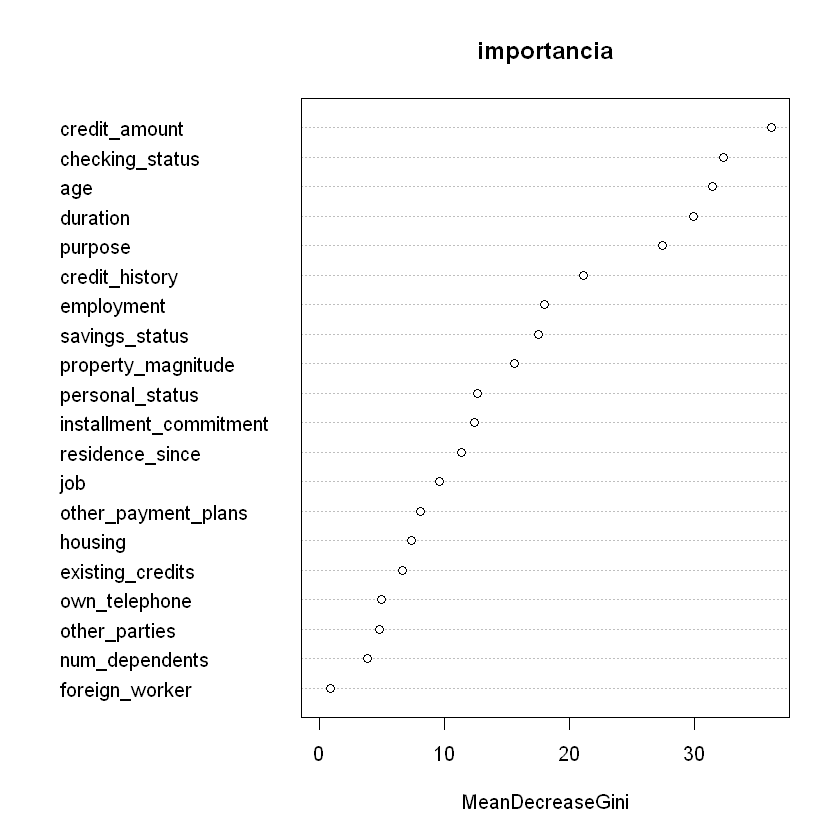

In [29]:
importancia = randomForest(class ~ ., data=datatreino)
col = importance(importancia)
col
varImpPlot(importancia)

## Modelo com atributos mais importantes

In [30]:
modelo = svm(class ~ credit_amount + checking_status + age + duration,
data=datatreino)
modelo


Call:
svm(formula = class ~ credit_amount + checking_status + age + duration, 
    data = datatreino)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  445


## Previsão e Matriz de Confusão com novo modelo

In [31]:
predicao = predict(modelo, newdata = datateste)
confusao = table(datateste$class, predicao)
confusao

taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaerro = (confusao[2] + confusao[3]) / sum(confusao)
taxaacerto
taxaerro

      predicao
       bad good
  bad   27   45
  good  14  176

[1] 0.7748092

[1] 0.2251908